# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q2, and one of Q1 or Q3.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
</br>

The attacks follow a wavy pattern (fitting for shark attacks), but general seems to be increasing.
4. Clean the Age variable and make a histogram of the ages of the victims.

5. What proportion of victims are male?
</br>

~.851

6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
</br>

~.834

7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.

8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
</br>

5% more likely to launch an attack on women. 93% more likely when unprovoked. 5% more likely to be fatal if it is a male.

Sharks are cool, but I should only see them in a movie like Jaws. I don't think I want to be in a situation where I'm physicall near one.

9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)
</br>

~.496

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_excel("GSAF5.xls")
df.head(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.isna().all(axis=0) # all columns has non_null data

Date              False
Year              False
Type              False
Country           False
State             False
Location          False
Activity          False
Name              False
Sex               False
Age               False
Injury            False
Fatal Y/N         False
Time              False
Species           False
Source            False
pdf               False
href formula      False
href              False
Case Number       False
Case Number.1     False
original order    False
Unnamed: 21       False
Unnamed: 22       False
dtype: bool

In [3]:
df[df["Year"] <= 1500]

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
6859,Ca 1200-1500 A.D.,1500.0,Unprovoked,MEXICO,NaN,NaN,NaN,male,M,NaN,...,NaN,J. Castro,1200AD-Mexico.pdf,1200AD-Mexico.pdf,1200AD-Mexico.pdf,1200.00.00,1200.00.00,134.0,NaN,NaN
6860,Ca.789-1033 A.D,1000.0,Unprovoked,USA,Puerto Rico,Archeological site,NaN,male,M,29,...,Tiger shark,P. Seigel,1000AD-PuertoRico.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1000.00.00,1000.00.00,133.0,NaN,NaN
6861,Ca. 77 A.D.,77.0,Unprovoked,NaN,Ionian Sea,NaN,Sponge diving,males,M,NaN,...,NaN,Perils mentioned by Pliny the Elder (23 A.D. t...,77AD-Pliny.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0077.00.00,0077.00.00,132.0,NaN,NaN
6862,Ca. 5 A.D.,5.0,Unprovoked,AUSTRALIA,New South Wales,Bondi,NaN,male,M,NaN,...,NaN,Waverly Library,5BC-AustralianAboriginal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5BC-Australia,5BC,131.0,NaN,NaN
6863,Ca. 214 B.C.,0.0,Unprovoked,NaN,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,NaN,...,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",214BC-Tharsys.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,214BC-Tharsus,214BC,130.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6988,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6989,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6990,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [4]:
df = df[df["Year"].notna()]
# df = df[~(df["Year"] >= 77)] 
df["Year"] = df["Year"].astype(int)
df["Year"].describe()

count    6990.000000
mean     1935.018598
std       272.082794
min         0.000000
25%      1947.000000
50%      1986.000000
75%      2009.000000
max      2026.000000
Name: Year, dtype: float64

In [5]:
df["Year"].unique()

array([2025, 2024, 2026, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016,
       2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1984,
       1994, 1993, 1992, 1991, 1990, 1989, 1969, 1988, 1987, 1986, 1985,
       1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973,
       1972, 1971, 1970, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961,
       1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950,
       1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943, 1942, 1941, 1940,
       1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930, 1929,
       1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921, 1920, 1919, 1918,
       1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910, 1909, 1908, 1907,
       1906, 1905, 1904, 1903, 1902, 1901, 1900, 1899, 1898, 1897, 1896,
       1895, 1894, 1893, 1892, 1891, 1890, 1889, 1888, 1887, 1886, 1885,
       1884, 1883, 1882, 1881, 1880, 1879, 1878, 18

Text(0.5, 1.0, 'Attacks by year')

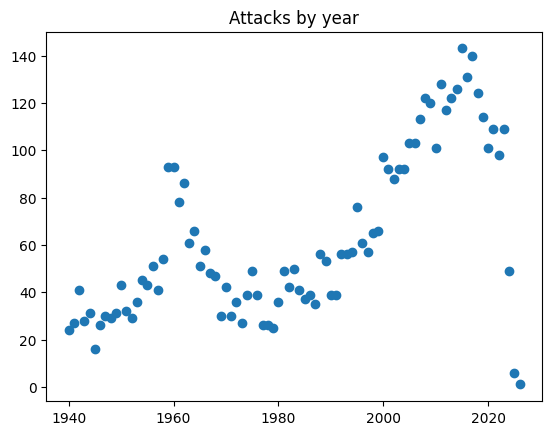

In [6]:
df_year = df[df["Year"] >= 1940]
grouped = df_year.groupby("Year").count()
plt.scatter(grouped.index, grouped["Date"]) # any var works here)
plt.title("Attacks by year")

In [7]:
df["Age"].isna().sum()

2993

In [8]:
df.dropna(inplace=True, subset="Age")

In [9]:
for val in df["Age"]:
    try:
        int(val)
    except:
        print(val)

60+
?
Middle age
?
?
30s
20/30
20s
!2
50s
50s
30s
30s
40s
teen
Teen
50s
M
40s
!6
!!
45 and 15
50s
Teen
30s
28 & 22
22, 57, 31
60s
20's
9 & 60
20s
30s
60s
a minor
40s
20s
20s
Teen
40s
60s
Teen
18 months
40s
20s
30s
50s
Teen
teen
teen
teen
28 & 26
30s
20s
Teen
teen
18 or 20
Teen
12 or 13
30s
20s
46 & 34
28, 23 & 30
teen
30s
Teens
30s
Teen
36 & 26
8 or 10
  
 
30 or 36
6½
21 & ?
33 or 37
mid-30s
23 & 20
7      &    31
20?
60's
32 & 30
30s
30s
16 to 18
Elderly
20s
mid-20s
Ca. 33
20s
 
21 or 26
20s
>50
18 to 22
adult
9 & 12
? & 19
9 months
Teen
25 to 35
23 & 26
(adult)
33 & 37
25 or 28
37, 67, 35, 27,  ? & 27
21, 34,24 & 35
30 & 32
50 & 30
17 & 35
X
"middle-age"
13 or 18
34 & 19
33 & 26
2 to 3 months
MAKE LINE GREEN
"young"
7 or 8
17 & 16
8 or 10
F
Both 11
9 or 10
young
36 & 23
Teen
50s
  
A.M.
?    &   14
10 or 12
31 or 33
Teen
2½
7 or 8
young
13 or 14


In [10]:
# case for +
df["Age"] = df["Age"].apply(lambda x: str(x).replace("+", ""))
df["Age"] = df["Age"].apply(lambda x: str(x).replace("s", ""))
df["Age"] = df["Age"].apply(lambda x: str(x).replace("'", ""))
df["Age"] = df["Age"].apply(lambda x: str(x).replace("?", ""))
df["Age"] = df["Age"].apply(lambda x: "16" if "teen" in str(x).lower() else x)
df["Age"] = df["Age"].apply(lambda x: "8" if "minor" in str(x).lower() else x)
df["Age"] = df["Age"].apply(lambda x: "5" if "young" in str(x).lower() else x)
df["Age"] = df["Age"].apply(lambda x: "40" if "middle-age" in str(x).lower() else x)
df["Age"] = df["Age"].apply(lambda x: x.split("or")[0] if "or" in str(x).lower() else x)

df = df[~(df["Age"] == "?")]
df = df[~df["Age"].str.strip().eq("")]
df = df[~(df["Age"].str.contains("!"))]

for index,row in df.iterrows():
    concat_after = []
    if "and" in str(row["Age"]):
        person1,person2 = row["Age"].split("and")
        df.at[index,"Age"] = person1
    if "&" in str(row["Age"]) and str(row["Age"]).count("&") == 1:
        person1,person2 = row["Age"].split("&")
        if not "":
            df.at[index,"Age"] = person1
        new_row = row.copy()
        new_row["Age"] = person2
        concat_after.append(new_row)

    if "," in str(row["Age"]):
        parts = [part.strip() for part in row["Age"].split(",")]
        if len(parts) > 1:
            df.at[index, "Age"] = parts[0] 
            
            for part in parts[1:]:
                if not "":
                    new_row = row.copy()
                    new_row["Age"] = part
                    concat_after.append(new_row)
    
concat_df = pd.DataFrame(concat_after)
df = pd.concat([concat_df,df], axis=0)

In [11]:
for val in df["Age"]:
    try:
        int(val)
    except:
        print(val)

Middle age
20/30
M
18 month
6½
mid-30
16 to 18
Elderly
mid-20
Ca. 33
>50
18 to 22
adult
 
9 month
25 to 35
(adult)
X
2 to 3 month
MAKE LINE GREEN
F
Both 11
A.M.
    
2½


(array([ 148., 1079., 1001.,  690.,  413.,  329.,  191.,   73.,   33.,
           5.]),
 array([ 1. ,  9.6, 18.2, 26.8, 35.4, 44. , 52.6, 61.2, 69.8, 78.4, 87. ]),
 <BarContainer object of 10 artists>)

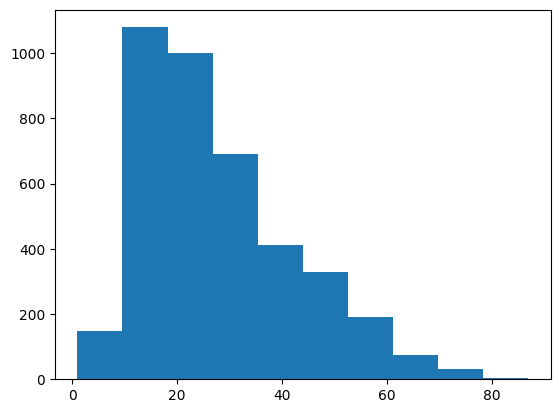

In [12]:
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df.dropna(subset=["Age"], inplace=True)
df["Age"] = df["Age"].astype(int)
plt.hist(df["Age"])

In [13]:
df["Sex"].unique()


array(['M', 'F', nan, ' M', 'M ', 'lli'], dtype=object)

In [14]:
df.dropna(inplace=True, subset="Sex")

In [15]:
df["Sex"] = df["Sex"].apply(lambda x: x.strip())
df = df[df["Sex"] != 'lli']

In [16]:
df[df["Sex"] == "M"].count()["Sex"]/df.shape[0]

0.8513892429263319

In [17]:
df.dropna(inplace=True,subset="Type")

In [18]:
df["Type"] = df["Type"].apply(lambda x: "Unknown" if not (("Unprovoked" in str(x)) or ("Provoked" in str(x))) else str(x))

In [19]:
df["Type"].value_counts()["Unprovoked"]/df["Type"].value_counts().sum()

0.8341426015844621

In [20]:
df = df[(df["Fatal Y/N"] == "N") | (df["Fatal Y/N"] == "Y") | (df["Fatal Y/N"] == "UNKNOWN")]

In [21]:
df["Fatal Y/N"].unique()

array(['N', 'Y', 'UNKNOWN'], dtype=object)

8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?

Sharks are cool, but I should only see them in a movie like Jaws. I don't think I want to be in a situation where I'm physicall near one.

In [23]:
crosstab = pd.crosstab(df['Type'], df['Sex'])
print(f"On Females {crosstab['F']['Unprovoked']/crosstab['F'].sum()}")
print(f"On Males {crosstab['M']['Unprovoked']/crosstab['M'].sum()}")

On Females 0.9261992619926199
On Males 0.8770753512132823


In [28]:
crosstab = pd.crosstab(df['Type'], df['Fatal Y/N'])
crosstab
print(f"Fatal Unprovoked {crosstab['Y']['Unprovoked']/crosstab['Y'].sum()}")
print(f"Fatal Provoked {crosstab['Y']['Provoked']/crosstab['Y'].sum()}")

Fatal Unprovoked 0.9422222222222222
Fatal Provoked 0.013333333333333334


In [199]:
crosstab = pd.crosstab(df['Fatal Y/N'], df['Sex'])
print(f"On Females {crosstab["F"]["Y"] / crosstab["F"]["N"]}")
print(f"On Males {crosstab["M"]["Y"] / crosstab["M"]["N"]}")
pd.crosstab(df['Fatal Y/N'], df['Sex'])

On Females 0.17608695652173914
On Males 0.23468984591070724


Sex,F,M
Fatal Y/N,,
N,460,2531
UNKNOWN,1,7
Y,81,594


In [239]:
df["Species "].dropna().apply(lambda x: "white shark" if "white shar" in str.lower(x) else x).value_counts()

Species 
white shark                    465
Tiger shark                     58
Bull shark                      56
4' shark                        38
6' shark                        32
                              ... 
Blacktip shark, 2m               1
Mako shark, 90kg                 1
Possibly a hammerhead shark      1
2.27 m shark                     1
2'  shark                        1
Name: count, Length: 936, dtype: int64

In [240]:
465/936

0.4967948717948718

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
</br>
     This paper is about defining what tidy data is and the tidyr package in R developed by Wickham to convert messy into data does.
  3. Read the introduction. What is the "tidy data standard" intended to accomplish?
</br>
The "tidy data standard" is a standard for clean data which allows a sort of specification for any develop tooling such that they can "clean data" towards the "tidy data standard"
  5. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
</br>
The first sentence talks on the nature of a tidy dataset vs. a messy dataset. All tidy datasets end up following the tidy data standard, but there are exponentinally more ways a messy dataset is "messy".
</br>
The second sentence highlights that variables themselves and what they are defined to measure are generally arbitrary. This is because it often depends on how you decide to structure the data or what you’re trying to measure, making the definitions flexible and context-dependent.
  7. Read Section 2.2. How does Wickham define values, variables, and observations?
</br>
    Values are numbers or strings that are tied to a variable and observations. Think of the cell intersecting a row and col.
</br>
    Variables contains the set of all the values or a definition of the values, i.e. categorical. numerical
</br>
    Observations contain all the values on a "unit" across the desired variables/attributes
  9. How is "Tidy Data" defined in section 2.3?
</br>
    Tidy data is defined as 1. each variable being a col, 2. each observation being a row, and 3. each type of unit forms a table. The third definition coming from the idea of 3NF, which just means that the table contains only observations relevant to the unit.
  11. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
</br>
    The most common problems are that column headers are values, multiple values in a col ([1,2]), variables are stored in both row/col, multiple observational units are in the same table, and a single unit is stored in multiple tables. Table 4 is messy because the columns are values instead of variable names. Melting the dataset allows you to convert the column values into a singular column. This "melts" and lets the values "drip" down essentially replacing the observational and column values into columns.
  12. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
</br>Same as Table 4, the column headers should be treated as values. In Table 12 the d1-d31 is melted to the date, and the values are then treated as a column.
  14. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?
</br>
Wickham highlights how that defining tidy data comes out of his development of tidy tools. He urges us to maybe come up with better definitions of tidy data and build tools for the better definition.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?